## Stack - Projeto Human Resources Analytics

### Machine Learning.

In [59]:
import pandas as pd
import datetime
import glob
from minio import Minio
import numpy as np
import matplotlib.pyplot as plt

In [60]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

### Baixando o Dataset do Data Lake.

In [61]:
client.fget_object(
            "processing",
            "employees_dataset.parquet",
            "temp_.parquet",
)
df = pd.read_parquet("temp_.parquet")

In [62]:
df.head()

,department,salary,left,department.1,salary.1,left.1,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0


#### Organizando o dataset.

In [63]:
df = df[['department', 'salary', 'mean_work_last_3_months',
       'number_projects', 'satisfaction_level', 'last_evaluation',
       'time_in_company', 'work_accident','left']]

In [64]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0


#### Verificando os registros missing.

In [65]:
df.isnull().sum()

department                 1
salary                     1
mean_work_last_3_months    0
number_projects            1
satisfaction_level         1
last_evaluation            1
time_in_company            1
work_accident              1
left                       1
dtype: int64

In [66]:
df[df.notnull()]

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14995,technical,low,253.333333,2.0,37.0,48.0,3.0,0.0,1.0
14996,technical,medium,288.000000,2.0,37.0,53.0,3.0,0.0,1.0
14997,support,low,272.000000,6.0,11.0,96.0,4.0,0.0,1.0
14998,support,low,276.666667,2.0,37.0,52.0,3.0,0.0,1.0


In [67]:
df = df[:14998]

#### Alterando os tipos de dados.

In [68]:
df["number_projects"] = df["number_projects"].astype(int)
df["mean_work_last_3_months"] = df["mean_work_last_3_months"].astype(int)
df["time_in_company"] = df["time_in_company"].astype(int)
df["work_accident"] = df["work_accident"].astype(int)
df["left"] = df["left"].astype(int)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   department               14998 non-null  object 
 1   salary                   14998 non-null  object 
 2   mean_work_last_3_months  14998 non-null  int32  
 3   number_projects          14998 non-null  int32  
 4   satisfaction_level       14998 non-null  float64
 5   last_evaluation          14998 non-null  float64
 6   time_in_company          14998 non-null  int32  
 7   work_accident            14998 non-null  int32  
 8   left                     14998 non-null  int32  
dtypes: float64(2), int32(5), object(2)
memory usage: 761.7+ KB


In [70]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


#### Renomeando atributos

In [71]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_projects': 'projectCount',
                        'mean_work_last_3_months': 'averageMonthlyHours',
                        'time_in_company': 'yearsAtCompany',
                        'work_accident': 'workAccident',
                        'left' : 'turnover'
                        })

In [72]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


## Preprocessamento

#### Converte os atributos categoricos valores numéricos.

In [73]:
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [74]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,7,1,266,2,38.0,53.0,3,0,1
1,7,2,252,5,80.0,86.0,6,0,1
2,7,2,289,7,11.0,88.0,4,0,1
3,7,1,275,5,72.0,87.0,5,0,1
4,7,1,292,2,37.0,52.0,3,0,1


#### Separando os conjuntos de dados.

In [75]:
target_name = 'turnover'
X = df.drop('turnover', axis=1)
y = df[target_name]

#### Transformando os dados.

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = MinMaxScaler()

In [78]:
X = scaler.fit_transform(X)

In [79]:
X

array([[0.77777778, 0.5       , 0.38202247, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.77777778, 1.        , 0.2247191 , ..., 0.78125   , 0.5       ,
        0.        ],
       [0.77777778, 1.        , 0.64044944, ..., 0.8125    , 0.25      ,
        0.        ],
       ...,
       [1.        , 0.5       , 0.23595506, ..., 0.1875    , 0.125     ,
        0.        ],
       [1.        , 1.        , 0.62921348, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.88888889, 0.5       , 0.4494382 , ..., 0.9375    , 0.25      ,
        0.        ]])

### Separando os conjuntos de dados.

<img src="https://www.researchgate.net/profile/Brian-Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png" align="left">

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

#### Treinando o algoritmo de arvore de decisão.

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

In [84]:
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns

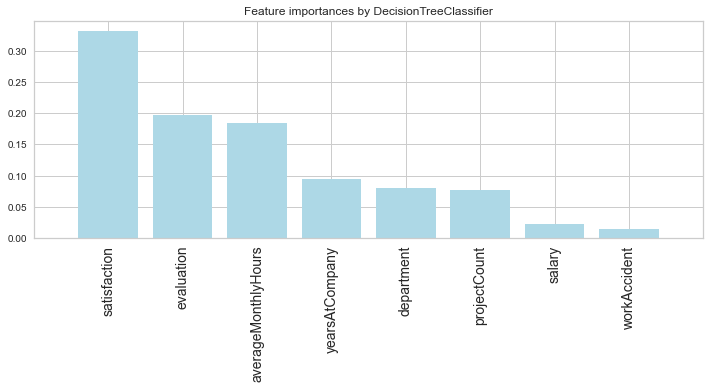

In [85]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

#### Filtrando apenas os atributos relevantes.

In [86]:
X = df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany"]]

#### Separando os conjuntos de dados.

In [87]:
scaler = MinMaxScaler()

In [88]:
X = scaler.fit_transform(X)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

In [90]:
X_train

array([[0.59340659, 0.21875   , 0.40449438, 0.125     ],
       [0.        , 0.703125  , 0.41573034, 0.25      ],
       [0.3956044 , 0.28125   , 0.58426966, 0.125     ],
       ...,
       [0.32967033, 0.3125    , 0.59550562, 0.125     ],
       [0.92307692, 0.28125   , 0.46067416, 0.        ],
       [0.51648352, 0.5       , 0.53932584, 0.125     ]])

#### Função do modelo de base.

In [91]:
# função para retornar se houve ou não uma decição, neste caso é forma mais simples de resolver o problemas.
# Para nosso problema 76% das vezes irá retorna 0 (sem turnover)

def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

#### Importando métodos de métrica de avaliação.

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [93]:
def accuracy_result(y_test,y_predict):
    acc = accuracy_score(y_test, y_predict)
    print ("Accuracy = %2.2f" % acc)

In [94]:
def roc_classification_report_results(model,y_test,y_predict):
    roc_ = roc_auc_score(y_test, y_predict)
    classfication_report = classification_report(y_test, y_predict)
    
    print ("\n{} AUC = {}\n".format(model, roc_))
    print(classfication_report)

#### Análise do modelo de baseline

In [95]:
y_predict = base_rate_model(X_test)

In [96]:
accuracy_result(y_test, y_predict)

Accuracy = 0.76


In [97]:
roc_classification_report_results("Base Model", y_test, y_predict)


Base Model AUC = 0.5

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2286
           1       0.00      0.00      0.00       714

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



### Modelo de Regressão Logística.

<img src="https://editor.analyticsvidhya.com/uploads/95588WhatsApp-Image-2020-02-11-at-8.30.11-PM.jpeg" align="left">

#### Instânciando o algoritmo.

In [98]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#### Realizando o treinamento.

In [99]:
logis.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Calculando as predições.

In [100]:
y_predict = logis.predict(X_test)

#### Avaliando o resultado.

In [101]:
accuracy_result(y_test, y_predict)

Accuracy = 0.77


In [102]:
roc_classification_report_results("Logistic Regression", y_test, y_predict)


Logistic Regression AUC = 0.5406235985207731

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      2286
           1       0.55      0.11      0.18       714

    accuracy                           0.77      3000
   macro avg       0.66      0.54      0.52      3000
weighted avg       0.72      0.77      0.70      3000



### Modelo de Arvore de decisão.

<img src="https://www.devops.ae/wp-content/uploads/2021/04/decision-tree-classification-algorithm.png" align="left">

#### Instânciando o algoritmo.

In [103]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

#### Realizando o treinamento.

In [104]:
dtree = dtree.fit(X_train,y_train)

#### Calculando as predições.

In [105]:
y_predict = dtree.predict(X_test)

#### Avaliando o resultado.

In [106]:
accuracy_result(y_test, y_predict)

Accuracy = 0.75


In [107]:
roc_classification_report_results("Decision Tree", y_test, y_predict)


Decision Tree AUC = 0.6692086283332231

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2286
           1       0.47      0.52      0.49       714

    accuracy                           0.75      3000
   macro avg       0.66      0.67      0.66      3000
weighted avg       0.76      0.75      0.75      3000



### Modelo de Floresta Aleatória (Random Forest)

<img src="https://miro.medium.com/max/1200/0*YEwFetXQGPB8aDFV" align="left">

#### Instânciando o algoritmo.

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf = RandomForestClassifier()

#### Realizando o treinamento.

In [110]:
rf = rf.fit(X_train,y_train)

#### Calculando as predições.

In [111]:
y_predict = rf.predict(X_test)

#### Avaliando o resultado.

In [112]:
accuracy_result(y_test, y_predict)

Accuracy = 0.83


In [113]:
roc_classification_report_results("Random Forest", y_test, y_predict)


Random Forest AUC = 0.7227092936912297

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2286
           1       0.68      0.52      0.59       714

    accuracy                           0.83      3000
   macro avg       0.77      0.72      0.74      3000
weighted avg       0.82      0.83      0.82      3000



### Pycaret

<img src="https://miro.medium.com/max/1024/0*T3u62CFmhRgur_ZZ.png" align="left">

<img src="https://i.pinimg.com/originals/28/c3/de/28c3decb69d2b89c42e3979a9565d84b.jpg" align="left">

In [114]:
pip install pycaret

#### Importando os métodos.

In [115]:
from pycaret.classification import *

#### Definindo o Setup.

In [117]:
s = setup( df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany","turnover"]]
          ,target = "turnover"
          ,numeric_features = ["averageMonthlyHours","yearsAtCompany"]
          ,normalize = True
          ,normalize_method = "minmax"
          ,data_split_stratify = True
          ,fix_imbalance = True,
         )

,Description,Value
0,session_id,5528
1,Target,turnover
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14998, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


#### Comparando diferentes modelos.

In [118]:
best = compare_models(fold = 5,sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8261,0.8040,0.6919,0.6218,0.6547,0.5390,0.5405,0.1540
lightgbm,Light Gradient Boosting Machine,0.8467,0.7964,0.6535,0.6878,0.6700,0.5703,0.5707,0.1180
ada,Ada Boost Classifier,0.8069,0.7944,0.7023,0.5783,0.6341,0.5047,0.5092,0.0640
rf,Random Forest Classifier,0.8155,0.7800,0.5722,0.6229,0.5962,0.4769,0.4779,0.1740
qda,Quadratic Discriminant Analysis,0.7252,0.7588,0.7507,0.4535,0.5654,0.3819,0.4079,0.0100
knn,K Neighbors Classifier,0.7362,0.7547,0.6875,0.4638,0.5537,0.3764,0.3913,0.3400
et,Extra Trees Classifier,0.8068,0.7542,0.5394,0.6064,0.5707,0.4466,0.4481,0.1280
nb,Naive Bayes,0.7156,0.7212,0.5954,0.4298,0.4992,0.3078,0.3158,0.2760
lr,Logistic Regression,0.6816,0.7005,0.6410,0.3958,0.4894,0.2764,0.2934,0.3920
lda,Linear Discriminant Analysis,0.6839,0.6995,0.6354,0.3976,0.4891,0.2775,0.2935,0.0100


#### Criando o modelo.

In [119]:
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8310,0.8045,0.7020,0.6302,0.6641,0.5516,0.5531
1,0.8033,0.7900,0.6700,0.5746,0.6187,0.4872,0.4898
2,0.8410,0.8139,0.6880,0.6590,0.6732,0.5682,0.5684
3,0.8275,0.8092,0.7120,0.6202,0.6629,0.5478,0.5502
4,0.8275,0.8023,0.6874,0.6248,0.6546,0.5400,0.5411
Mean,0.8261,0.8040,0.6919,0.6218,0.6547,0.5390,0.5405
SD,0.0124,0.0080,0.0143,0.0272,0.0190,0.0275,0.0268


#### Realizando o tunning do modelo.

In [ ]:
tuned_gbc = tune_model(gbc
                      ,fold = 5
                      ,custom_grid = {
                                      "learning_rate":[0.1,0.2,0.5]
                                     ,"n_estimators":[100,500,1000]
                                     ,"min_samples_split":[1,2,5,10]
                                     ,"max_depth":[1,3,9]
                                     }
                      ,optimize = 'AUC')

In [120]:
predict_model(gbc, data=df)

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover,Label,Score
0,7,1,266,2,38.0,53.0,3,0,1,1,0.8402
1,7,2,252,5,80.0,86.0,6,0,1,1,0.6455
2,7,2,289,7,11.0,88.0,4,0,1,1,0.8207
3,7,1,275,5,72.0,87.0,5,0,1,1,0.7893
4,7,1,292,2,37.0,52.0,3,0,1,1,0.8279
...,...,...,...,...,...,...,...,...,...,...,...
14993,7,1,279,6,76.0,83.0,6,0,1,1,0.7102
14994,7,1,287,2,40.0,57.0,3,0,1,1,0.7886
14995,9,1,253,2,37.0,48.0,3,0,1,1,0.8147
14996,9,2,288,2,37.0,53.0,3,0,1,1,0.8279


#### Finalizando o modelo.

In [121]:
final_model = finalize_model(gbc)

In [122]:
save_model(final_model,'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['averageMonthlyHours',
                                                           'yearsAtCompany'],
                                       target='turnover', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_

#### Transferindo os arquivos para o Data Lake.

#### Modelo de Classificação.

In [123]:
client.fput_object(
    "curated",
    "model.pkl",
    "model.pkl"
)

#### Exportando o conjunto de dados para o disco.

In [124]:
df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany","turnover"]].to_csv("dataset.csv",index=False)

In [125]:
client.fput_object(
    "curated",
    "dataset.csv",
    "dataset.csv"
)